In [1]:
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.linalg import inv
import mplcursors


In [2]:
def inital_W(C):
    """finds the initial weight matrix W, given a covariance matrix C"""
    ones = np.ones((len(C), 1))
    # W = np.transpose(
    #     np.matmul(np.transpose(ones), inv(C))
    #     / np.matmul((np.matmul(np.transpose(ones), inv(C))), ones)
    # )
    W = ((ones.T @ inv(C)) / ((ones.T) @ inv(C) @ ones)).T
    return W


def getMin_μσ2(μ, C, show=True):
    """gets the minimum value of μ and σ**2 for a given expected return matrix μ\n
    and a covariance matrix C, if show is true function returns a string"""
    W = inital_W(C)
    # σ2_min = np.matmul(np.matmul(np.transpose(W), C), W)
    σ2_min = W.T @ C @ W
    μ_min = W.T @ μ
    if show:
        return f"μ_min  = {μ_min[0][0]}  \nσ2_min = { σ2_min[0][0]}"
    return μ_min[0][0], σ2_min[0][0]


def get_μσ2(μ, C, W, show=True):
    """gets the value of μ and σ**2, for a given expected return matrix μ\n and a covariance matrix C, and a weight matrix W.\nif show is true function returns a string"""
    # σ2 = np.matmul(np.matmul(np.transpose(W), C), W)
    σ2 = W.T @ C @ W
    # μ = np.matmul(np.transpose(W), μ)
    μ = W.T @ μ
    if show:
        return f"μ  = {μ[0][0]}  \n σ2 = { σ2[0][0]}"
    return μ[0][0], σ2[0][0]


def Markowitz(muval, μ, C):
    """Solve the Markowitz problem given a value specific value of return- muval
    the excpected return vector (μ) and the covariance matrix (C)"""
    if muval == 0:
        muval = getMin_μσ2(μ, C, False)[0]
    # set up vector for all the weights on the Right Hand Side (RHS)
    RHS = np.array([[0] for i in range(len(μ))])
    # adds the value of μ and 1 to the RHS vector (forming the last 2 constraints)
    RHS = np.vstack((RHS, np.array([[muval], [1]])))
    # the following gets to the covariance matrix and adds the labmda variable coefficients
    # to create the Left Hand Side of the equation
    LHS = np.append(C, -μ, axis=1)
    LHS = np.append(LHS, -np.ones((len(C), 1)), axis=1)
    LHS = np.vstack((LHS, np.append(μ, [0, 0])))
    LHS = np.vstack((LHS, np.append(np.ones(len(C)), [0, 0])))
    # this line solves it and returns (ONLY) the values of the weights
    # return pd.DataFrame(LHS), pd.DataFrame(RHS)
    return (inv(LHS) @ RHS)[: len(μ)]


# Markowitz(2, μ, C)


In [3]:

def plotEfficientFrontier(μ, C, lb=-1, ub=2, show=True):
    '''this functions plots the efficient frontier given a vector μ-Expected return per period over the comodities
        C-covariance matrix of the comodities
        if show is True it will plot the graph
        else it will return the list(zip(sigmalist, mewplotlist))
                    (sigma, mew) of the efficient frontier
    '''
    sigmalist = []
    mewplotlist = []
    colour = []
    for i in range(lb*1000, ub*1000):  # change this range to what you want to show
        i /= 1000
        W = Markowitz(i, μ, C)
        if i < 0:
            colour.append('red')
        elif i > 0 and i <= 1:
            colour.append('green')
        elif i > 1:
            colour.append('blue')
        else:
            colour.append('none')
        mewplot = (W.T @ μ)[0][0]
        # mewplot = np.matmul(np.transpose(W), )[0][0]
        # sig2 = sqrt(np.matmul(np.matmul(np.transpose(W), C), (W))[0][0])
        # print(((W.T C@ W.T)[0][0]))
        sig2 = sqrt((W.T@ C@ W)[0][0])
        mewplotlist.append(mewplot)
        sigmalist.append(sig2)
    if show:
        plt.title('Efficient Frontier')
        plt.xlabel('σ (volatility)')
        plt.ylabel('μ (return)')
        plt.scatter(sigmalist, mewplotlist, c=colour, s=2, )
        mplcursors.cursor(hover=True)
        # plt.show()
        import mpld3
        mpld3.show()
        return
    return list(zip(sigmalist, mewplotlist))
plotEfficientFrontier(μ, C)


NameError: name 'μ' is not defined

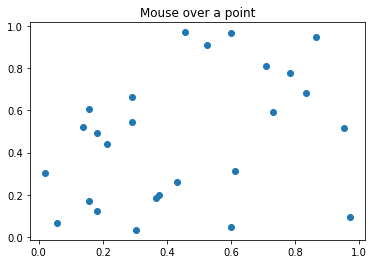

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
np.random.seed(42)

fig, ax = plt.subplots()
ax.scatter(*np.random.random((2, 26)))
ax.set_title("Mouse over a point")
crs = mplcursors.cursor(ax,hover=True)

crs.connect("add", lambda sel: sel.annotation.set_text(
    'Point {},{}'.format(sel.target[0], sel.target[1])))
plt.show()

In [ ]:
def MAT(x):
    rows = x.split("\n")
    array = []
    for row in rows:
        numbers = row.split(" ")
        row = []
        for number in numbers:
            try:
                row.append(float(number))
            except:
                pass
        array.append(row)
    array = np.array(array)
    return array


In [ ]:

DF = pd.read_csv('Assignment3-data.csv', delimiter=';')
AR = np.array(DF)
DF


,Date,BTC,ETH,DOGE,LTC,HEX
0,2021-02-15,48696.535156,1804.676758,0.062568,214.324997,0.010862
1,2021-02-16,47944.457031,1778.945557,0.056488,207.610443,0.010084
2,2021-02-17,49207.277344,1781.350098,0.053522,210.569031,0.010415
3,2021-02-18,52140.972656,1848.206299,0.049363,236.949249,0.010655
4,2021-02-19,51675.980469,1938.859863,0.059434,226.899292,0.009991
...,...,...,...,...,...,...
361,2022-02-11,43571.128906,3077.413086,0.151895,135.092850,0.209780
362,2022-02-12,42412.300781,2927.386475,0.144856,126.012909,0.203888
363,2022-02-13,42236.566406,2916.789551,0.144379,126.670776,0.205782
364,2022-02-14,42157.398438,2880.187744,0.148869,126.134789,0.200421


In [ ]:
DF_R = pd.DataFrame()
for col in DF.columns[1:]:
    # DF_R.loc[0, 'r_'+col] = 0 # taken out because you only use sum of 1 to T
    for i in range(1, len(DF[col])):
        try:
            DF_R.loc[i, 'r_'+col] = ((DF.loc[i, col] -
                                     DF.loc[i-1, col]) / DF.loc[i-1, col])
        except IndexError:
            print(f'error in {i}, in {col}')
R_array = np.array(DF_R)
R_array


array([[-0.01544418, -0.01425807, -0.09717427, -0.03132884, -0.07162585],
       [ 0.02633923,  0.00135167, -0.05250673,  0.01425067,  0.03282428],
       [ 0.05961914,  0.0375312 , -0.07770636,  0.12528062,  0.02304369],
       ...,
       [-0.00414348, -0.00361993, -0.00329293,  0.00522063,  0.00928941],
       [-0.00187439, -0.01254866,  0.03109871, -0.00423134, -0.02605184],
       [ 0.01050194,  0.01858272, -0.01927869, -0.01064785, -0.00966965]])

In [ ]:
# C = np.array(pd.DataFrame.C(DF_R))*365
μ = np.round(np.array([[i] for i in np.sum(R_array, axis=0)]), 4)
C = np.round(np.cov(R_array, rowvar=False)*252, 4)
C, μ

(array([[0.5503, 0.5949, 0.5917, 0.6673, 0.2434],
        [0.5949, 0.9903, 0.8513, 0.9041, 0.3626],
        [0.5917, 0.8513, 3.5886, 1.0684, 0.4884],
        [0.6673, 0.9041, 1.0684, 1.2532, 0.4335],
        [0.2434, 0.3626, 0.4884, 0.4335, 2.4273]]),
 array([[0.1419],
        [0.9854],
        [2.397 ],
        [0.1064],
        [4.0827]]))

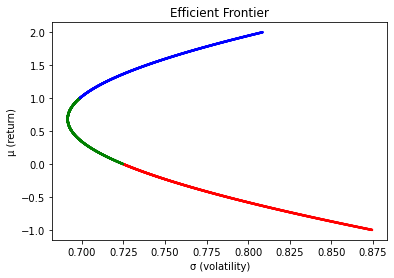

In [ ]:
plotEfficientFrontier(μ, C)


In [ ]:
μ


array([[0.1419],
       [0.9854],
       [2.397 ],
       [0.1064],
       [4.0827]])

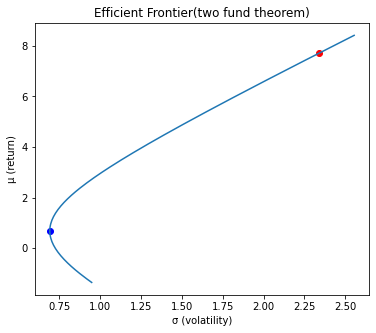

In [ ]:
def two_fund_theorem_from_matrix(μ, C, r, show=True, fig=None):
    if not fig:
        fig = plt.figure(figsize=(6, 5))
    ones = np.ones((len(C), 1))
    W_min = inital_W(C)
    # W_market = np.transpose(np.matmul(np.transpose(μ-r*ones), inv(C)) /np.matmul((np.matmul(np.transpose(μ-r*ones), inv(C))), ones))
    W_market = (((μ - r * ones).T @ inv(C)) / ((μ - r * ones).T @ inv(C) @ ones)).T
    μ1, σ21 = get_μσ2(μ, C, W_min, False)
    μ2, σ22 = get_μσ2(μ, C, W_market, False)
    σ1, σ2 = sqrt(σ21), sqrt(σ22)
    # if μ1 < μ2 and σ21 < σ22:
    #     μ1, σ21, μ2, σ22 = μ2, σ22, μ1, σ21
    μpoints, σpoints, colours = [], [], []
    covMinMarket = np.matmul(np.matmul(np.transpose(W_min), C), W_market)

    for w in range(-10, 130):
        w /= 100
        if w < 0:
            colours.append("red")
        elif w > 0 and w < 1:
            colours.append("green")
        elif w > 1:
            colours.append("blue")
        else:
            colours.append("black")
        σv = sqrt(
            ((w**2) * (σ21))
            + (2 * w * (1 - w) * covMinMarket)
            + (((1 - w) ** 2) * (σ22))
        )
        μv = w * μ1 + (1 - w) * μ2
        μpoints.append(μv)
        σpoints.append(σv)
    axarr = fig.add_subplot(1, 1, 1)
    plt.plot(σpoints, μpoints)
    if show:
        plt.title("Efficient Frontier(two fund theorem)")
        plt.xlabel("σ (volatility)")
        plt.ylabel("μ (return)")
        plt.scatter((σ1), μ1, c="b")
        plt.scatter((σ2), μ2, c="r")
        plt.show()
        return
    return σpoints, μpoints


r = 1 / 100
two_fund_theorem_from_matrix(μ, C, r)
# plotEfficientFrontier(μ, C)


In [ ]:
def two_fund_theorem_from_points(μ1, σ1, μ2, σ2, covMinMarket=0, show=True, fig=None):
    # two_fund_theorem_from_points(market_μ, market_σ, μ_min, σ_min, row, show=False, fig=fig)
    if not fig:
        fig = plt.figure(figsize=(6, 5))
    if μ1 < μ2 and σ1 < σ2:
        μ1, σ1, μ2, σ2 = μ2, σ2, μ1, σ1
    μpoints, σpoints, colours = [], [], []

    for w in range(-100, 1501):
        w /= 1000
        if w < 0:
            colours.append('red')
        elif w > 0 and w <= 1:
            colours.append('green')
        elif w > 1:
            colours.append('blue')
        else:
            colours.append('none')
        μv = w*μ1 + (1-w)*μ2
        σv = sqrt((w**2*σ1**2)+(2*w*(1-w)*covMinMarket) + ((1-w)**2*σ2**2))
        μpoints.append(μv)
        σpoints.append(σv)
    axarr = fig.add_subplot(1, 1, 1)
    plt.plot(σpoints, μpoints)
    if show:
        plt.title('Efficient Frontier(two fund theorem)')
        plt.xlabel('σ (volatility)')
        plt.ylabel('μ (return)')
        plt.scatter((σ1), μ1,  c='b')
        plt.scatter((σ2), μ2,  c='r')
        plt.show()
        return
    return σpoints, μpoints


# W1 = (inital_W(C))
# ones = np.ones((len(C), 1))
# W2 = np.transpose(np.matmul(np.transpose(μ-r*ones), inv(C)) /
#                   np.matmul((np.matmul(np.transpose(μ-r*ones), inv(C))),    ones))

# μ1, σ1 = get_μσ2(μ, C, W1, False)
# μ2, σ2 = get_μσ2(μ, C, W2, False)
# two_fund_theorem_from_points(μ1, sqrt(σ1), μ2, sqrt(σ2), 0.3)


In [ ]:
# rf = 1/100
# ones = np.ones((len(C), 1))
# W = np.transpose(np.matmul(np.transpose(μ-rf*ones), inv(C)) /
#                  np.matmul((np.matmul(np.transpose(μ-rf*ones), inv(C))),    ones))

def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

print(bmatrix(np.transpose(μ)))

\begin{bmatrix}
  0.1419 & 0.9854 & 2.397 & 0.1064 & 4.0827\\
\end{bmatrix}



[[-0.96857547]
 [ 1.9341937 ]
 [ 0.50950553]
 [-1.67396799]
 [ 1.19884423]]
[[-1.36084831  2.7175417   0.71585515 -2.35192464  1.68437586]] [[1.40499977]]


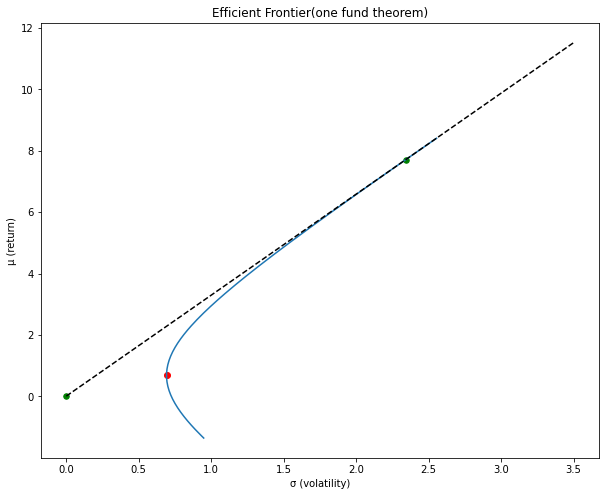

$\mu_{min} = 0.681752$ and  $\sigma_{min}^2 = 0.691459^2$
$\mu_{M} = 7.70621$ and  $\sigma_{M}^2 = 2.340455^2$
min weights  \begin{bmatrix}
  1.14361526 & -0.0118701 & 0.01114916 & -0.27358096 & 0.13068665\\
\end{bmatrix}
market weights  \begin{bmatrix}
  -0.96857547 & 1.9341937 & 0.50950553 & -1.67396799 & 1.19884423\\
\end{bmatrix}


In [ ]:
def OneFundTheorem(μ, C, rf, end = 3.5):
    ones = np.ones((len(C), 1))
    W_market = np.transpose(np.matmul(np.transpose(μ-rf*ones), inv(C)) /
                            np.matmul((np.matmul(np.transpose(μ-rf*ones), inv(C))),    ones))
    W_min = inital_W(C)
    market_μ, σ2p1 = get_μσ2(μ, C, W_market, False)
    μ_min, σ_min = get_μσ2(μ, C, W_min, False)
    market_σ = sqrt(σ2p1)
    σ_min = sqrt(σ_min)
    # print(market_μ, market_σ)
    print()
    sigma = np.linspace(0, end)
    mew = rf+sigma*(market_μ-rf)/market_σ
    fig = plt.figure(figsize=(10, 8))
    # two_fund_theorem_from_points(
    #     market_μ, market_σ, μ_min, σ_min, covMinMarket, show=False, fig=fig)
    two_fund_theorem_from_matrix(μ, C, rf, show=False, fig=fig)
    plt.title('Efficient Frontier(one fund theorem)')
    plt.xlabel('σ (volatility)')
    plt.ylabel('μ (return)')
    plt.scatter((0), rf,  c='green', s=30)
    plt.plot(sigma, mew, c='black', linestyle='dashed')
    plt.scatter((σ_min), μ_min,  c='red')
    plt.scatter((market_σ), market_μ,  c='green', s=30)
    plt.show()
    # min = 'min'
    print(f'$\mu_{{min}} = {round(μ_min, 6)}$ and  $\sigma_{{min}}^2 = {round(σ_min, 6)}^2$')
    print(f'$\mu_{{M}} = {round(market_μ, 6)}$ and  $\sigma_{{M}}^2 = {round(market_σ, 6)}^2$')
    print('min weights ',bmatrix(np.transpose(W_min)))
    print('market weights ', bmatrix(np.transpose(W_market)))

OneFundTheorem(μ, C, 1/100)


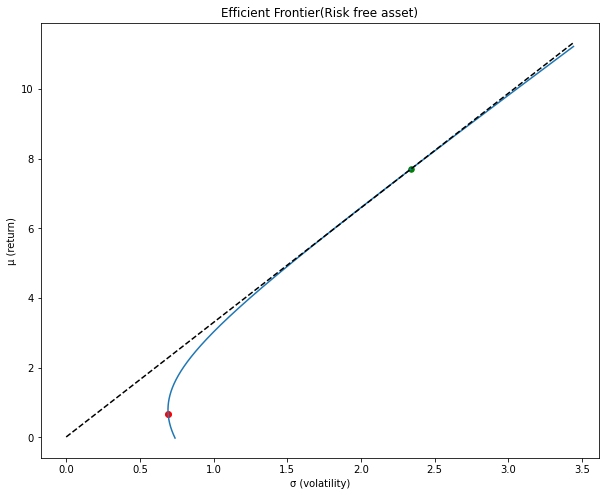

2.3403913908603187 7.706000000000002


In [ ]:
def RiskFreeAssest(μ, C, rf, covMinMarket):
    dic = {}
    for (σc, μc) in plotEfficientFrontier(μ, C, lb=-1, ub=20,show=False):
        dic[((μc-rf)/σc)] = (μc)
    W_market = Markowitz(dic[max(dic)], μ, C)
    W_min = inital_W(C)
    market_μ, σ2p1 = get_μσ2(μ, C, W_market, False)
    market_σ = sqrt(σ2p1)
    μ_min, σ_min = get_μσ2(μ, C, W_min, False)
    σ_min = sqrt(σ_min)
    # covMinMarket = np.matmul(np.matmul(np.transpose(W_min), C), W_market)
        # this is the line from the rf point to the market portfolio
    # capitalmarket line
    fig = plt.figure(figsize=(10, 8))
    # usign the 2 fund theorem to plot the efficeint frontier
    val = two_fund_theorem_from_points(
        μ_min, σ_min, market_μ, market_σ,  covMinMarket, show=False, fig=fig)
    sigma = np.linspace(0, max(val[0]))
    mew = rf+sigma*(market_μ-rf)/market_σ
    plt.title('Efficient Frontier(Risk free asset)')
    plt.xlabel('σ (volatility)')
    plt.ylabel('μ (return)')
    plt.plot(sigma, mew, c='black', linestyle='dashed')
    plt.scatter((σ_min), μ_min,  c='red')
    plt.scatter((market_σ), market_μ,  c='green', s=30)
    plt.show()
    # print('Risk free asset weights ', pd.DataFrame(np.transpose(W_min)).to_latex(), pd.DataFrame(np.transpose(W_market)).to_latex())
    print((market_σ), market_μ)


RiskFreeAssest(μ, C, 1/100, 0.4)
# in theory this row value should be equal to 0 because the value of the one is set and has no variance
# but if that happens we dont plot the tangent to the graph anymore.
# the minimum-variance portfolio, depicted in red
#  the tangency portfolio, depicted in green
# efficient frontier depicted in blue
#  capital market line (depicted in black dash)


# part 4 of task 2



[[-3.88164307]
 [ 8.19553007]
 [ 2.16583614]
 [-5.47972314]]
[[-1.40436836  2.96512145  0.78359388 -1.98254957]] [[0.3617974]]


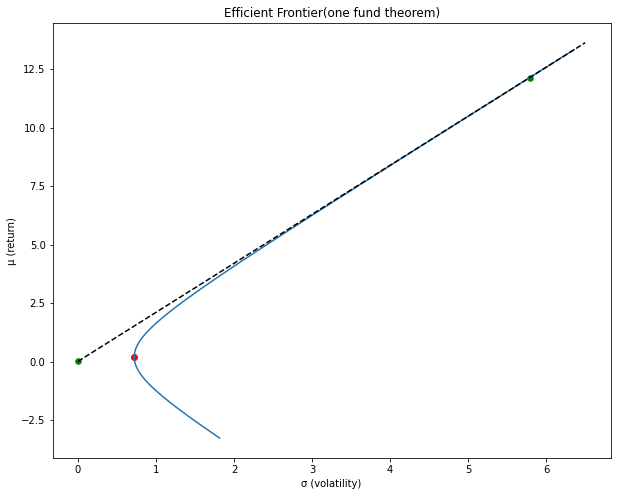

$\mu_{min} = 0.198233$ and  $\sigma_{min}^2 = 0.7213^2$
$\mu_{M} = 12.134341$ and  $\sigma_{M}^2 = 5.788904^2$
min weights  \begin{bmatrix}
  1.2406331 & 0.00789434 & 0.01783561 & -0.26636306\\
\end{bmatrix}
market weights  \begin{bmatrix}
  -3.88164307 & 8.19553007 & 2.16583614 & -5.47972314\\
\end{bmatrix}


In [ ]:
R_array2 = R_array[:, :4]
μ2 = np.array([[i] for i in np.sum(R_array2, axis=0)])
C2 = np.cov(R_array2, rowvar=False)*365

# plotEfficientFrontier(μ2, C2)

# two_fund_theorem1(μ2, C2, 1/100)
# two_fund_theorem2(μ1, sqrt(σ1), μ2, sqrt(σ2), 0.3)

OneFundTheorem(μ2, C2, 1/100, 6.5)


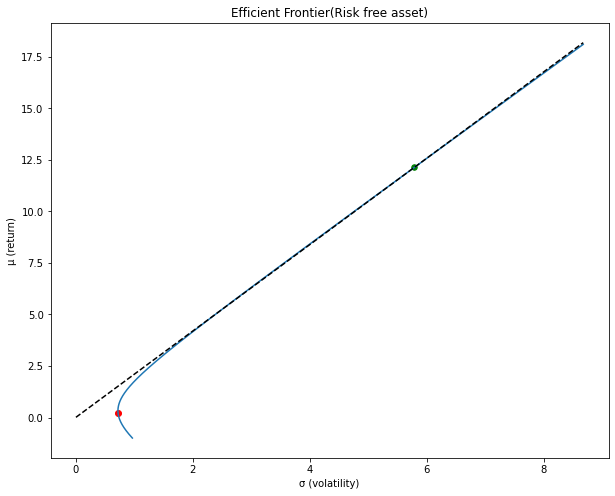

5.7887411795642265 12.134


In [ ]:
RiskFreeAssest(μ2, C2, 1/100, 0.15)